In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

import sklearn
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
df = pd.read_csv("top10s.csv", index_col=0, header=0,encoding='ISO-8859-1') 
# df.head()

In [3]:
#Renaming the columns
df.rename(columns={'title':'Track Name','artist':'Artist Name','bpm':'Beats Per Minute','top genre':'Genre','nrgy':'Energy','dnce':'Danceability', 'dB':'Loudness dB','spch':'Speechiness','live':'Liveness','val':'Valence','dur':'Length','acous':'Acousticness','pop':'Popularity'},inplace=True)
# df.head()

In [4]:
# The datatypes of the different columns
# print(df.dtypes)

In [5]:
# Get initial descriptive statistics on the columns
pd.set_option('precision', 3)
# df.describe()

In [6]:
# Calculating the number of songs of each genre
# group and count
group_genre = df.groupby('Genre').size()
group_genre = group_genre.sort_values(ascending=False)
genre_list = df['Genre'].values.tolist()
genre20 = group_genre[0:20,]
genre20 = genre20.sort_values(ascending=True)
genre20 = pd.DataFrame(genre20, columns = [ 'Song # of each Genre'])
# genre20.head()

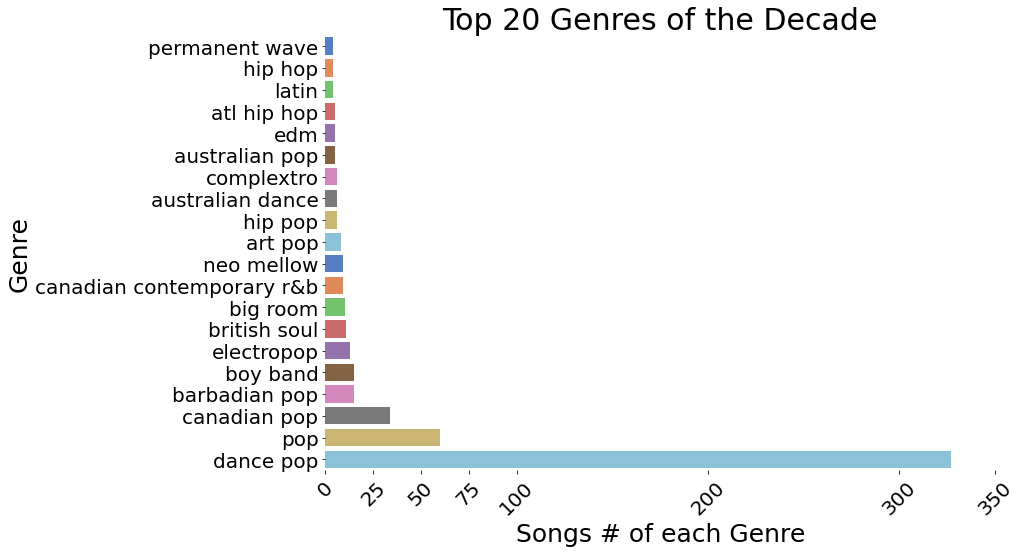

In [7]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'Song # of each Genre' , y = genre20.index , data = genre20, orient = 'h', palette = sns.color_palette("muted", 20), saturation = 0.8)
plt.title("Top 20 Genres of the Decade",fontsize=30)
plt.xlabel('Songs # of each Genre', fontsize=25)
plt.ylabel('Genre', fontsize=25)
xticks = [0, 25, 50, 75, 100, 200, 300, 350]
# xticks = [0, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340]
plt.xticks(xticks, size=20,rotation=45)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

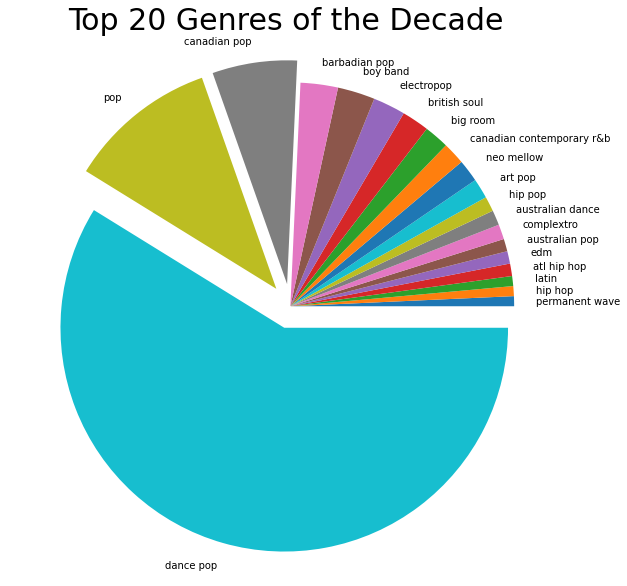

In [8]:
#Pie chart to show top 20 genres
genre_index = genre20.index
genre_value = genre20.values
EXPLODE = (  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1)
plt.figure(figsize = (10,10))
plt.pie(genre_value, labels = genre_index, explode = EXPLODE)
plt.title("Top 20 Genres of the Decade", fontsize=30)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [9]:
#Calculating the least popular genres
genre_rest29 = group_genre[21:,]
genre_rest29 = genre_rest29.sort_values(ascending=True)
genre_rest29 = pd.DataFrame(genre_rest29, columns = [ 'Song # of each Genre'])
genre_rest29.head()

,Song # of each Genre
Genre,
chicago rap,1
canadian latin,1
electro house,1
celtic rock,1
hollywood,1


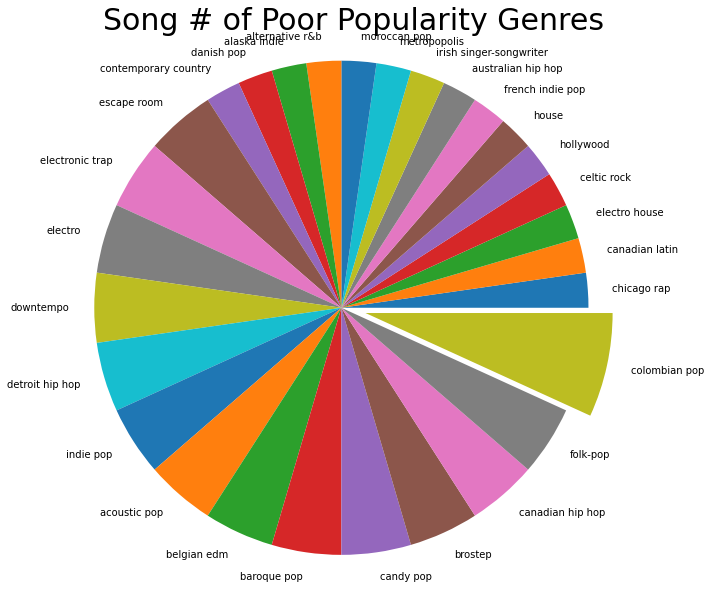

In [10]:
#Pie chart to show bottom 29 genres
genre_index_poor = genre_rest29.index
genre_value_poor = genre_rest29.values
EXPLODE29 = ( 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)
plt.figure(figsize = (10,10))
plt.pie(genre_value_poor, labels = genre_index_poor, explode = EXPLODE29)
plt.title("Song # of Poor Popularity Genres", fontsize=30)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [11]:
#Calculating the number of songs by each of the artists
group_artist = df.groupby('Artist Name').size()
group_artist = group_artist.sort_values(ascending=False)
artist_list=df['Artist Name'].values.tolist()
artist25 = group_artist[0:25,]
artist25 = artist25.sort_values(ascending=True)
artist25 = pd.DataFrame(artist25, columns = [ 'Song # of each Genre'])
artist25.head() 

,Song # of each Genre
Artist Name,
DNCE,7
One Direction,7
Taylor Swift,8
Demi Lovato,8
Selena Gomez,8


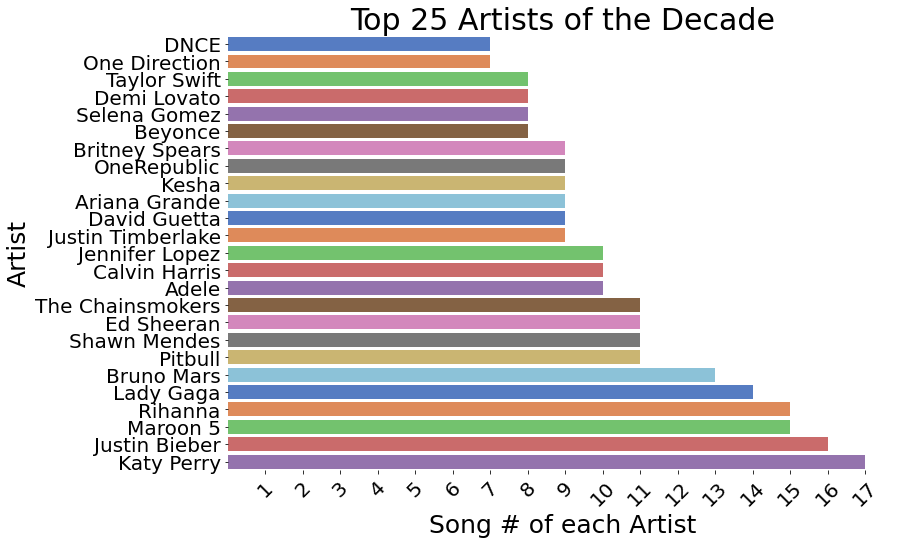

In [12]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'Song # of each Genre' , y = artist25.index , data = artist25, orient = 'h', palette = sns.color_palette("muted", 25), saturation = 0.8)
plt.title("Top 25 Artists of the Decade",fontsize=30)
plt.xlabel('Song # of each Artist', fontsize=25)
plt.ylabel('Artist', fontsize=25)
xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
plt.xticks(xticks, size=20,rotation=45)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

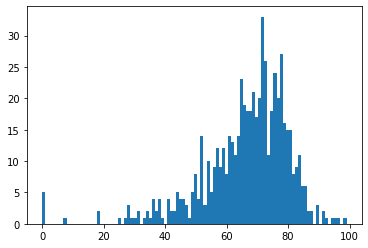

In [13]:
# Plotting a histogram to show the spread of Popularity since we notice some strange stats worth investigating
plt.hist(df['Popularity'],bins=100)
plt.show()

In [14]:
# Investigating low popularity
low_pop = df[df['Popularity'] <= 20]
# low_pop

In [15]:
# Drop the useless data
df.loc[df['Popularity']==0]

,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
139,Blow Me (One Last Kiss),P!nk,dance pop,2012,114,92,60,-3,25,75,256,0,4,0
268,Not a Bad Thing,Justin Timberlake,dance pop,2014,86,73,59,-6,38,46,266,27,6,0
363,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0
443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


In [16]:
df = df.drop(df.index[[50, 138, 267, 362, 442]])
df = df.reset_index()
# df.iloc[[50, 138, 267, 362, 442]]

In [17]:
# drop index
df = df.drop('index', axis=1)
df.head()

,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


EDA

In [18]:
pd.set_option('precision', 3)
# df.describe()

In [19]:
# drop the fisrt 4 colums
df_features = df.drop(df.columns[[0, 1, 2, 3]], axis =1)
df_features.head()

,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,97,89,67,-4,8,80,217,19,4,83
1,87,93,75,-5,52,64,263,24,23,82
2,120,84,76,-3,29,71,200,10,14,80
3,119,92,70,-4,8,71,295,0,4,79
4,109,84,64,-5,9,43,221,2,4,78


In [20]:
# Normalization
df_norm = df_features[:]
Scaler = MinMaxScaler() 
df_norm = Scaler.fit_transform(df_norm)
df_norm = pd.DataFrame(df_norm, columns = df_features.columns)
df_norm.describe()

,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000
mean,0.464,0.708,0.561,0.731,0.219,0.514,0.313,0.145,0.120,0.653
std,0.148,0.170,0.178,0.131,0.182,0.239,0.118,0.210,0.167,0.144
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.350,0.606,0.459,0.692,0.097,0.330,0.234,0.020,0.022,0.576
50%,0.472,0.745,0.581,0.769,0.139,0.511,0.298,0.061,0.044,0.674
75%,0.528,0.830,0.686,0.846,0.306,0.691,0.362,0.172,0.133,0.750
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


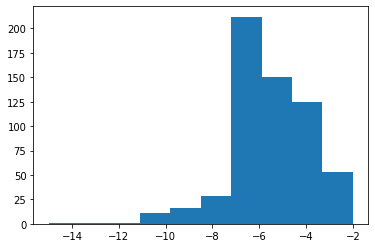

In [21]:
# Plotting a histogram to show the difference (note the x-axis)
plt.hist(df_features['Loudness dB'], bins=10)
plt.show()

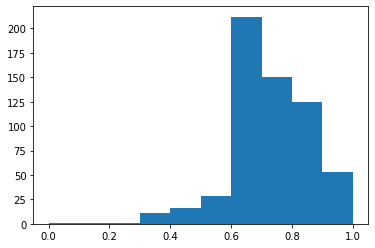

In [22]:
plt.hist(df_norm['Loudness dB'], bins=10)          #standardized data
plt.show()

In [23]:
#Fitting the PCA algorithm with our Data  
pca = PCA().fit(df_norm)

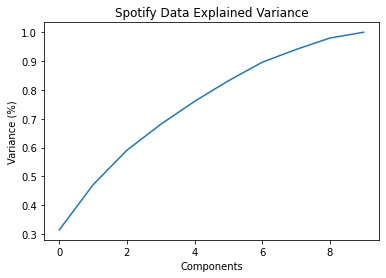

In [24]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Spotify Data Explained Variance')
plt.show()

In [25]:
# print the explained variance for each component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.31458694 0.15669507 0.11975973 0.08978314 0.07951685 0.0713788
 0.06426573 0.04430385 0.03961352 0.0200964 ]


In [26]:
# how much variance can be explained for 8 components
print('The explained variance for this many components is:  ',explained_variance[0:8].sum())

The explained variance for this many components is:   0.9402900879604088


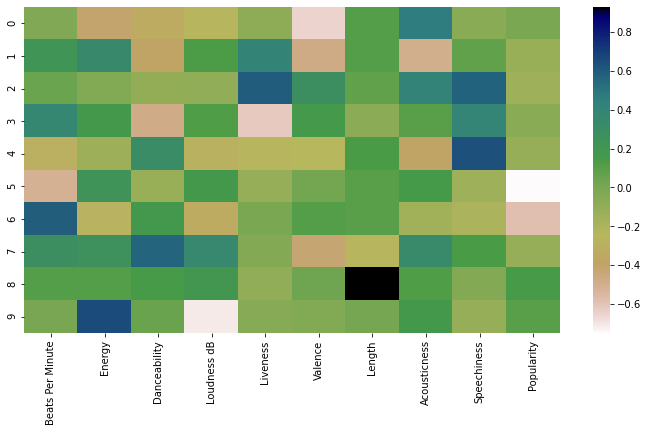

In [27]:
# visually inspect pca
map = pd.DataFrame(pca.components_, columns=df_norm.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map, cmap='gist_earth_r')

In [28]:
# choose number of components
pca = PCA(n_components = 8)
data_pca = pca.fit_transform(df_norm)

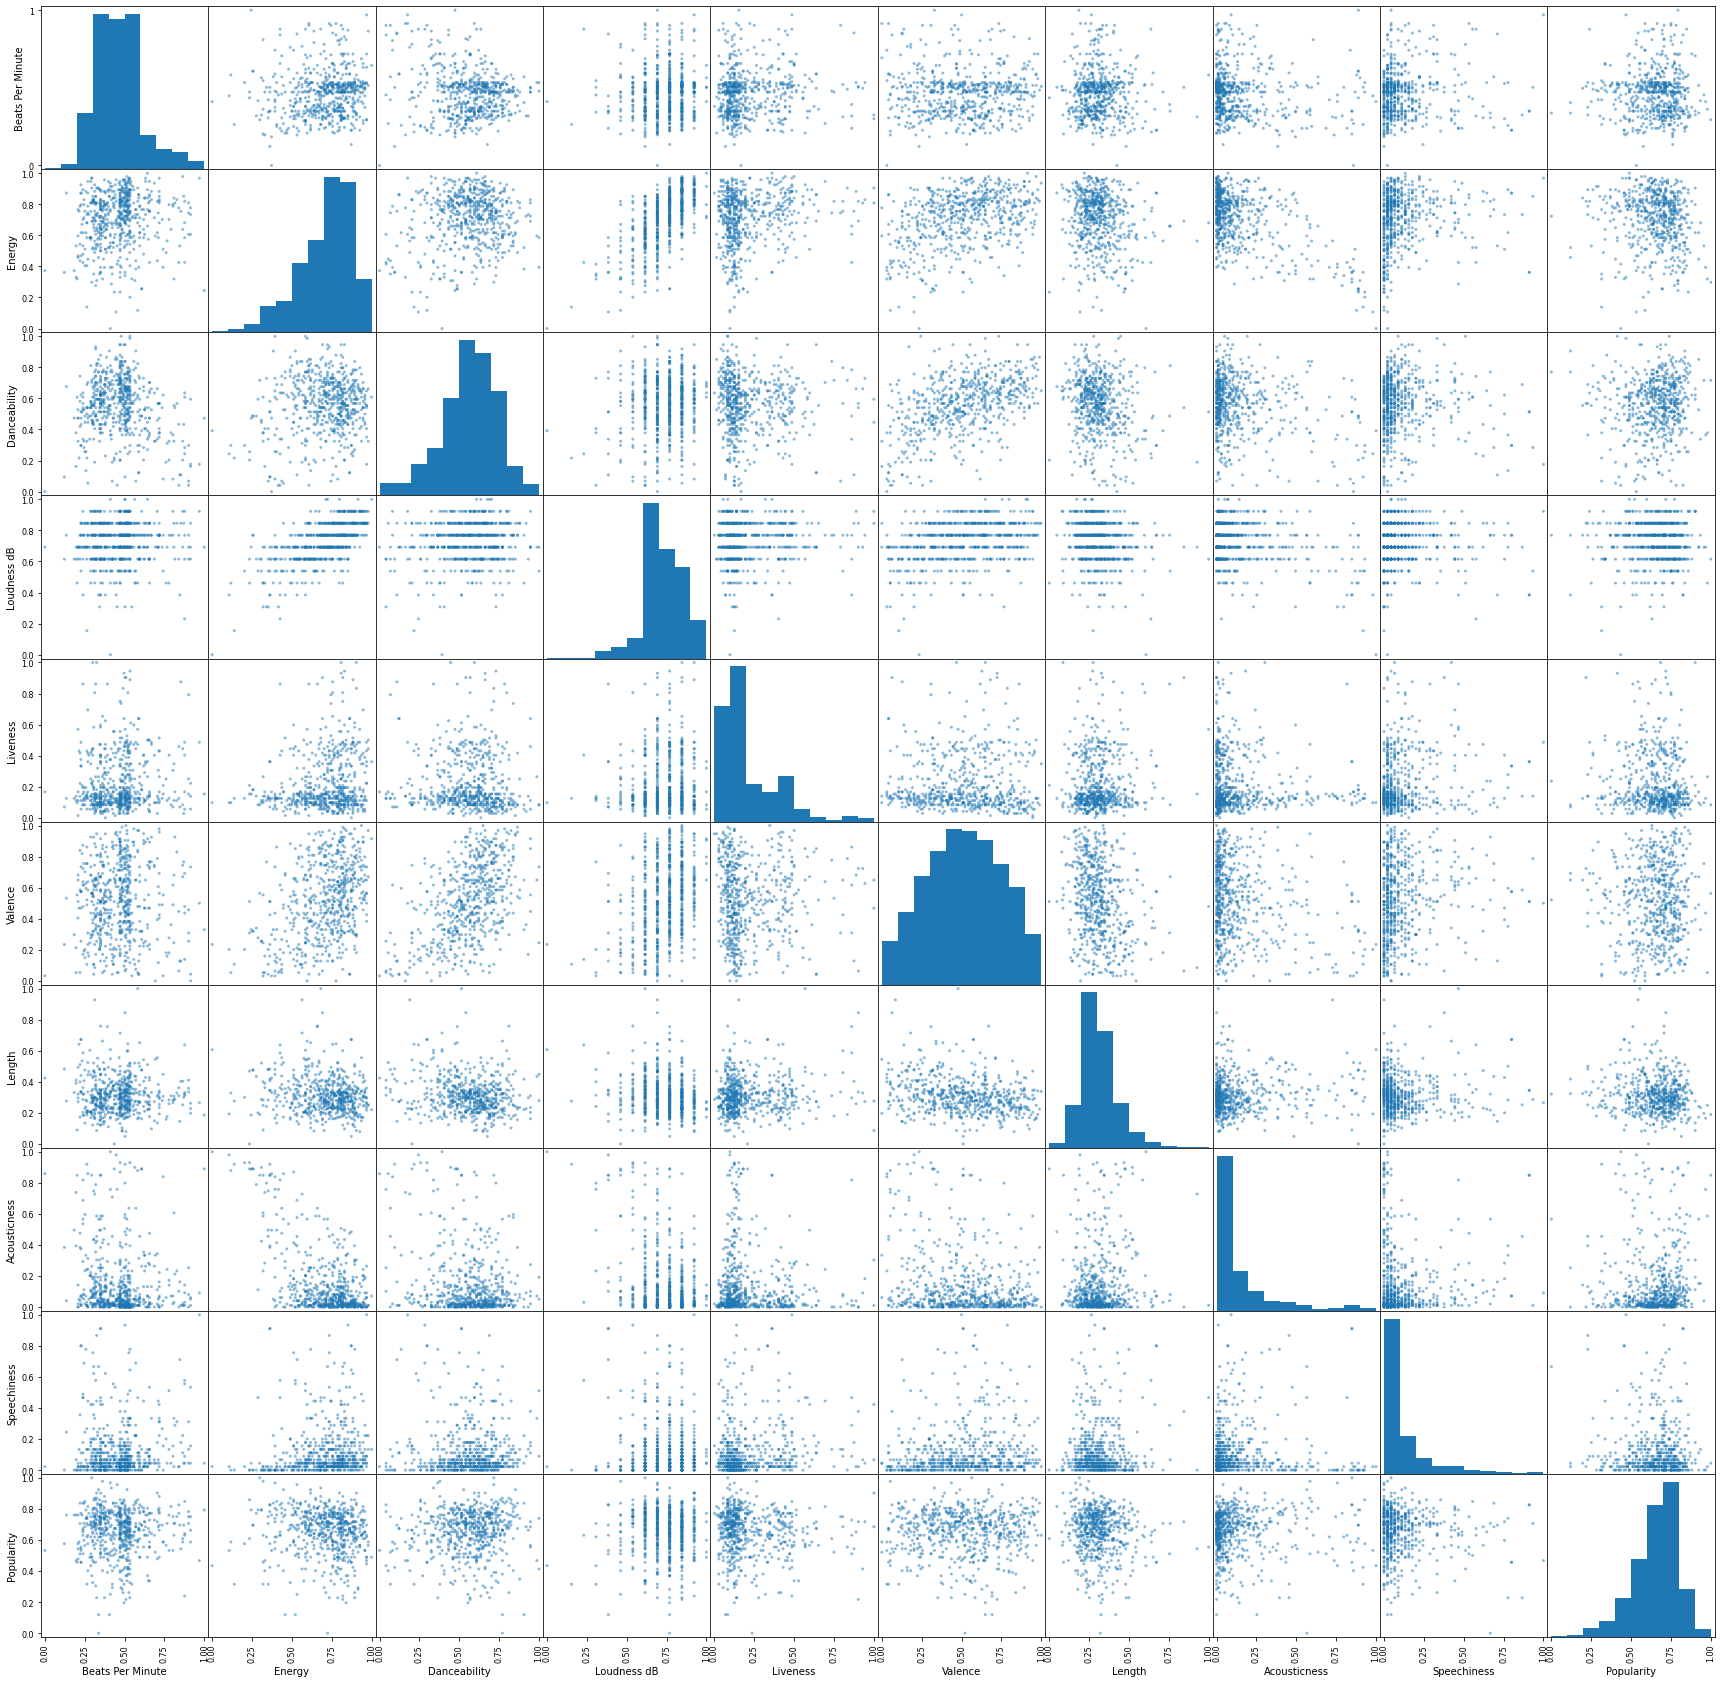

In [29]:
# Visualizing the relationship between all features
scatter_matrix(df_norm)
plt.gcf().set_size_inches(30, 30)
plt.show()

In [30]:
# Use a spearman correlation to measure the relationship between features
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlation = df_norm.corr(method='spearman')
display(correlation)

,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
Beats Per Minute,1.000,0.145,-0.084,0.088,0.095,0.025,0.031,-0.156,0.053,-0.042
Energy,0.145,1.000,0.019,0.634,0.138,0.366,-0.141,-0.340,0.219,-0.149
Danceability,-0.084,0.019,1.000,0.074,-0.103,0.481,-0.173,-0.114,0.085,0.100
Loudness dB,0.088,0.634,0.074,1.000,0.057,0.324,-0.173,-0.168,0.063,-0.050
Liveness,0.095,0.138,-0.103,0.057,1.000,-0.060,0.062,-0.062,0.120,-0.095
Valence,0.025,0.366,0.481,0.324,-0.060,1.000,-0.265,-0.185,0.185,0.011
Length,0.031,-0.141,-0.173,-0.173,0.062,-0.265,1.000,0.042,-0.082,-0.080
Acousticness,-0.156,-0.340,-0.114,-0.168,-0.062,-0.185,0.042,1.000,-0.041,0.100
Speechiness,0.053,0.219,0.085,0.063,0.120,0.185,-0.082,-0.041,1.000,-0.030
Popularity,-0.042,-0.149,0.100,-0.050,-0.095,0.011,-0.080,0.100,-0.030,1.000


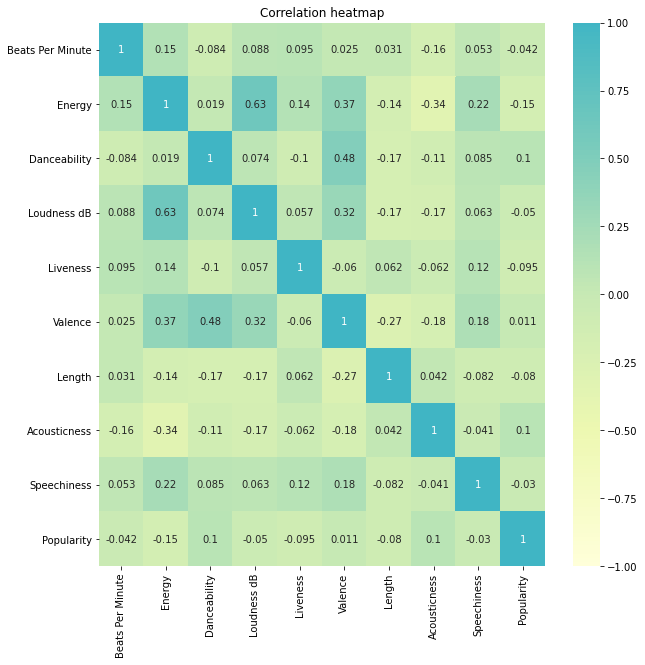

In [31]:
# heatmap of the correlation to visualize the relationships between features
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", center=1)

The spearman correlation is:   0.48133621845749974


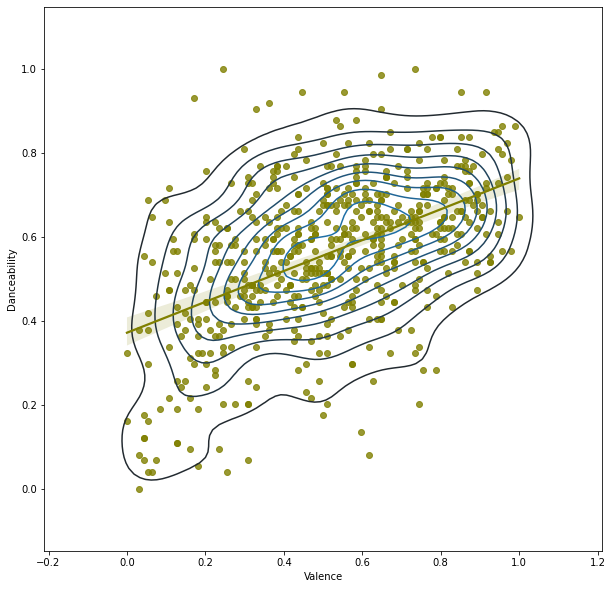

In [32]:
# Analysing the relationship between Danceablity and Valence
fig = plt.subplots(figsize = (10,10))
sns.regplot(x = 'Valence', y = 'Danceability', data = df_norm, color = 'olive')
sns.kdeplot(df_norm['Valence'], df_norm['Danceability'])
print('The spearman correlation is:  ',correlation['Danceability']['Valence'])

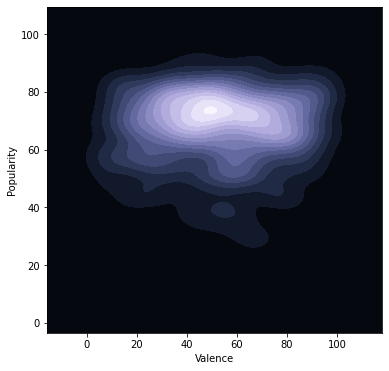

In [33]:
# Analysing the relationship between valence vs popularity
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True, start=2.8, rot=.1)
sns.kdeplot(df['Valence'], df['Popularity'], cmap=cmap, n_levels=16, shade=True);

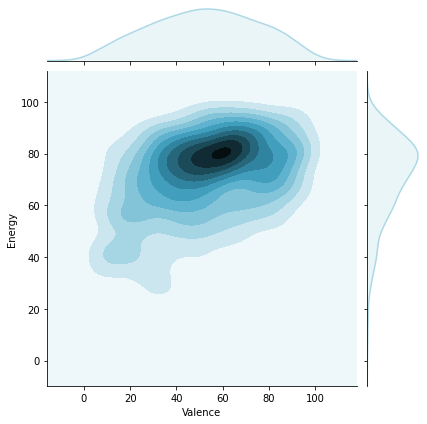

In [34]:
# Analysing the relationship between valence vs energy
sns.jointplot(x=df['Valence'], y=df['Energy'], data=df, kind="kde", color='lightblue');

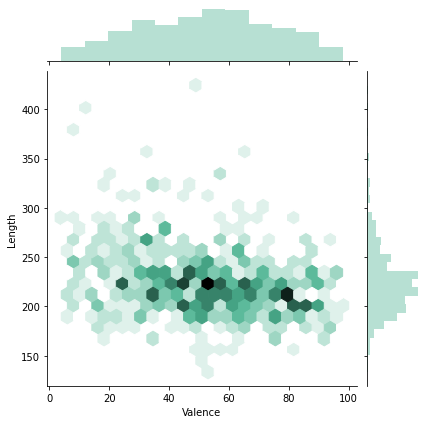

In [35]:
# Analysing the relationship between valence vs length
sns.jointplot(df['Valence'], df['Length'], kind="hex", color="#4CB391")

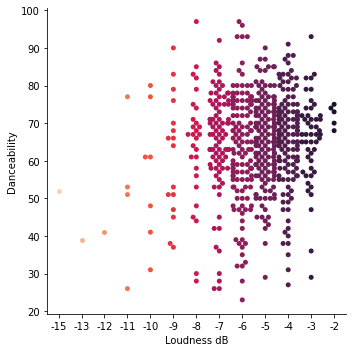

In [36]:
# Analysing the relationship between loudness vs danceability
sns.catplot(y="Danceability", x="Loudness dB", kind = "swarm", data = df_features, palette = 'rocket_r')

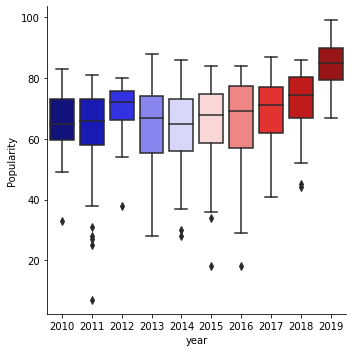

In [37]:
# Analysing the spread of popularity throught the years
sns.catplot(y = "Popularity", x = "year", kind = "box", data = df, palette = 'seismic')

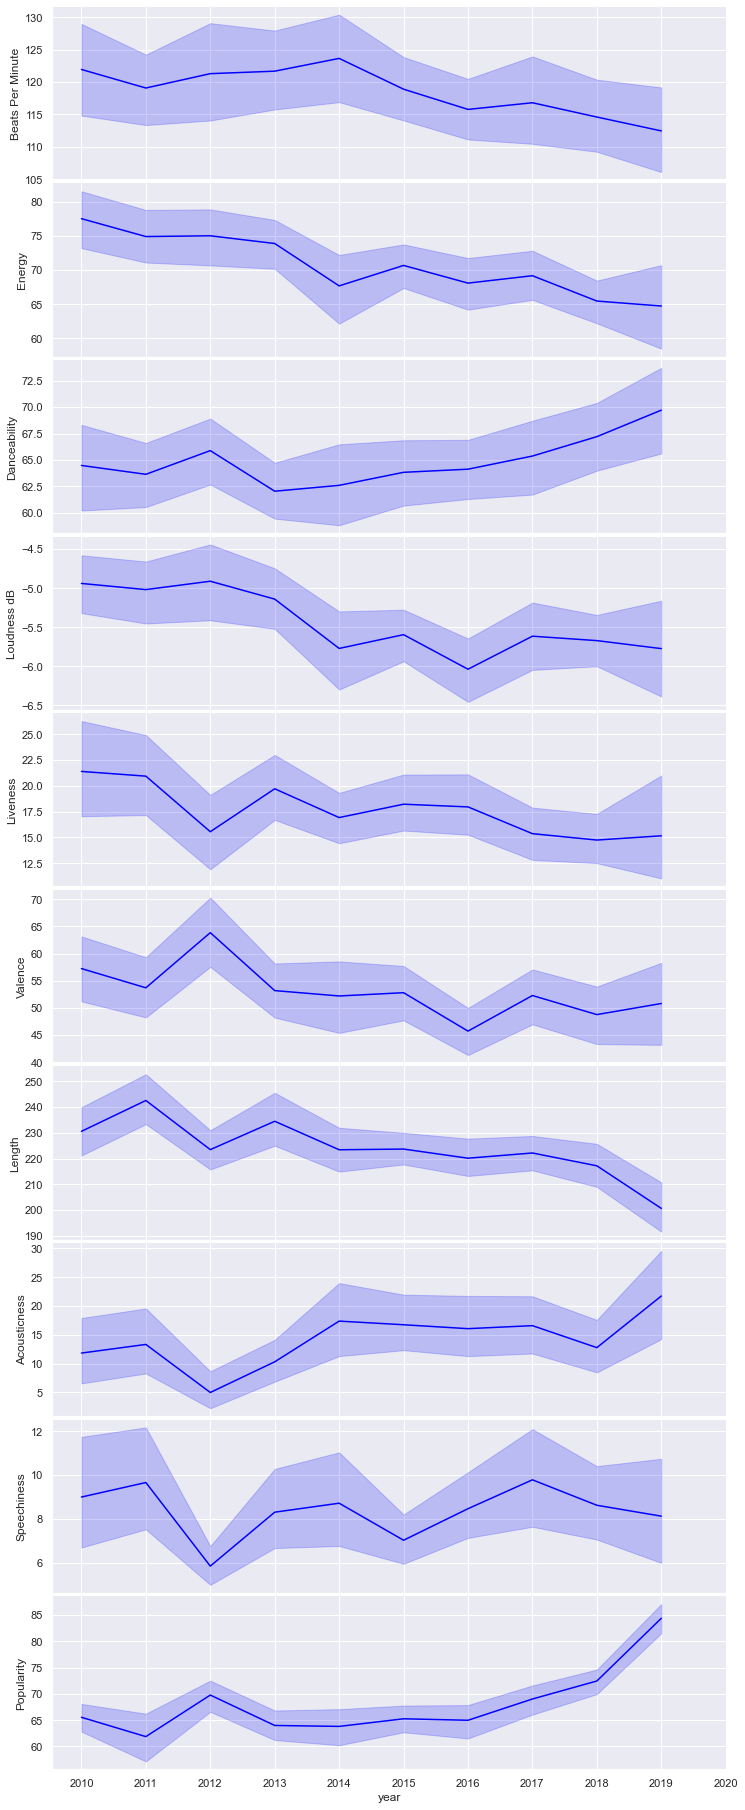

In [38]:
# PairGrid to analyze trends over the years
sns.set()
g = sns.PairGrid(df, y_vars = ['Beats Per Minute', 'Energy', 'Danceability', 'Loudness dB', 
                               'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'] , x_vars = ['year'], aspect = 4)
g = g.map(sns.lineplot, color="blue")
# Adjust the tick positions and labels
g.set(xticks=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
# Adjust the arrangement of the plots
g.fig.subplots_adjust(wspace=.02, hspace=.02);

Multiple Linear Regression to make a prediction for 2020

In [39]:
# insert year cloumn into features df
df_features.insert(0, 'year', df['year'])
df_features.head()

,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,2010,97,89,67,-4,8,80,217,19,4,83
1,2010,87,93,75,-5,52,64,263,24,23,82
2,2010,120,84,76,-3,29,71,200,10,14,80
3,2010,119,92,70,-4,8,71,295,0,4,79
4,2010,109,84,64,-5,9,43,221,2,4,78


In [40]:
# setup features and target
X = df_features[['year']]
y = data_pca
# can switch variable z to y to see effect of all features on predicition (also change y to z)
z = df_features[['Beats Per Minute', 'Energy', 'Danceability', 'Loudness dB', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity']]

In [52]:
# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Instantiate model
model_Linear = LinearRegression()
# Fit Model
model_Linear.fit(X_train, y_train)
# Predict
y_pred = model_Linear.predict(X_test)
# RMSE
print('The Root Mean Squared Error for this model is:  ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
X_train.shape, y_train.shape, X_test.shape

The Root Mean Squared Error for this model is:   0.19570924597449305


((478, 1), (478, 8), (120, 1))

In [63]:
# K-Fold Cross Val 
model_K = LinearRegression()
model_K.fit(X, y)
MSE_K = cross_val_score(model_K, X, y, scoring='neg_mean_squared_error', cv=10)
# fix the sign of MSE scores
MSE_scores = -MSE_K
# convert from MSE to RMSE
RMSE_K = np.sqrt(MSE_scores)
# calculate the average RMSE
print('The Root Mean Squared Error for this model is:  ', RMSE_scores.mean())

The Root Mean Squared Error for this model is:   0.18502810663638045


In [64]:
# Ridge Regression and GridSearchCV
ridge = Ridge()
params = { 'alpha' : [ 1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 40, 80, 100, 1000, 10000 ]  }
model_rr = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv=10)
model_rr.fit(X, y)
print(model_rr.best_params_)
print(model_rr.best_score_)
MSE_rr = -(rr.best_score_)
RMSE_rr = np.sqrt(MSE_rr)
print('The Root Mean Squared Error for this model is:  ', RMSE_rr)

{'alpha': 1000}
-0.03441818151551166
The Root Mean Squared Error for this model is:   0.18552137751620879


In [65]:
# Lasso Regression and GridSearchCV
lasso = Lasso()
params = { 'alpha' : [ 1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 40, 80, 100, 1000, 10000 ]  }
model_lr = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv=10)
model_lr.fit(X, y)
print(model_lr.best_params_)
print(model_lr.best_score_)
MSE_lr = -(model_lr.best_score_)
RMSE_lr = np.sqrt(MSE_lr)
print('The Root Mean Squared Error for this model is:  ', RMSE_lr)

{'alpha': 0.001}
-0.034449202703944005
The Root Mean Squared Error for this model is:   0.18560496411449778


In [73]:
# predict a hit song in 2020's features
song_pre = model_K.predict([[2020]])
# song_pre

In [74]:
# reverse pca
song_pre = pca.inverse_transform(song_pre)
# song_pre

In [75]:
# reverse normalization
song_pre = Scaler.inverse_transform(song_pre)
# song_pre

In [76]:
# get the features of the prediciton into a dataframe
song_pre = pd.DataFrame(song_pre)
song_pre = song_pre.drop(columns = 9, axis=1)
# song_pre

In [77]:
# make a prediction for 2020 using the machine learning classifier KNN
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(df_features[['Beats Per Minute','Energy','Danceability','Loudness dB','Liveness','Valence', 'Length', 'Acousticness', 'Speechiness']], df_features.index)
feature_pred = KNN.predict(song_pre)
feature_pred = pd.DataFrame(feature_pred)
feature_pred

,0
0,388


In [78]:
# look up the index
target_song = df.iloc[[388]]
target_song

,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
388,Close,Nick Jonas,dance pop,2016,124,62,65,-5,14,40,234,25,8,72


In [57]:
# Part 4 - Make Playlists based off of the feature characteristics using Machine Learning technique K-Means Clustering
# Finding out the skew for each feature
skew = df_features.skew()
print(skew)

year               -0.188
Beats Per Minute    0.707
Energy             -0.923
Danceability       -0.554
Loudness dB        -0.999
Liveness            1.733
Valence            -0.068
Length              1.348
Acousticness        2.196
Speechiness         2.534
Popularity         -0.960
dtype: float64


In [58]:
# scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.766,-0.898,1.151,0.188,0.878,-0.745,1.233,-0.224,0.221,-0.586,1.204
1,-1.766,-1.312,1.401,0.797,0.289,2.616,0.520,1.124,0.462,1.949,1.129
2,-1.766,0.056,0.839,0.873,1.466,0.859,0.832,-0.723,-0.211,0.748,0.977
3,-1.766,0.014,1.339,0.416,0.878,-0.745,0.832,2.061,-0.692,-0.586,0.902
4,-1.766,-0.400,0.839,-0.040,0.289,-0.669,-0.416,-0.107,-0.596,-0.586,0.826


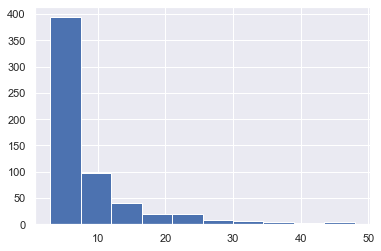

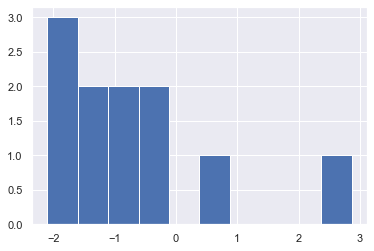

In [59]:
# Plot to show the difference
plt.hist(df_features['Speechiness'], bins=10)                    #original data
plt.show()
plt.hist(df_scaled.iloc[8], bins=10)                            #standardized data
plt.show()

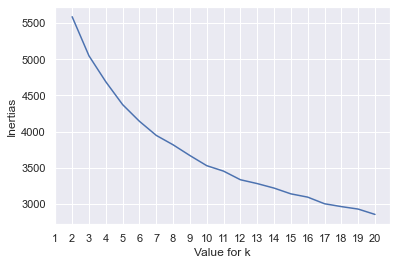

In [60]:
# choose the best number of clusters using elbow method and inertia
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
inertias = []

for i in k:
    km = KMeans(n_clusters=i, max_iter=1000, random_state=42)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

plt.plot(k, inertias)
plt.xlabel("Value for k")
plt.ylabel("Inertias")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

plt.show()

In [49]:
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

score=[]

for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    score.append(silhouette_score(df_scaled, kmeans.labels_))
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.2205
Silhouette Score for 3 Clusters: 0.1177
Silhouette Score for 4 Clusters: 0.1177
Silhouette Score for 5 Clusters: 0.1203
Silhouette Score for 6 Clusters: 0.1165
Silhouette Score for 7 Clusters: 0.1077
Silhouette Score for 8 Clusters: 0.1099
Silhouette Score for 9 Clusters: 0.1079
Silhouette Score for 10 Clusters: 0.1126
Silhouette Score for 11 Clusters: 0.1097
Silhouette Score for 12 Clusters: 0.1015
Silhouette Score for 13 Clusters: 0.1010
Silhouette Score for 14 Clusters: 0.0923
Silhouette Score for 15 Clusters: 0.1102
Silhouette Score for 16 Clusters: 0.0996
Silhouette Score for 17 Clusters: 0.0924
Silhouette Score for 18 Clusters: 0.1023
Silhouette Score for 19 Clusters: 0.1102
Silhouette Score for 20 Clusters: 0.1036


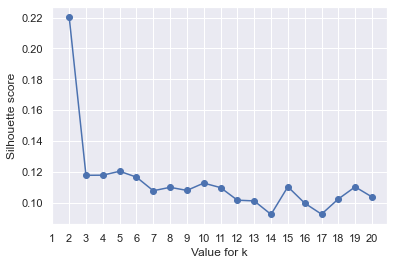

In [50]:
# plot cluster options

plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

plt.show()

In [51]:
# set number of clusters

kclusters = 8


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=42).fit(df_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([5, 2, 5, 5, 5, 5, 5, 0, 3, 5])

In [52]:
# add clustering labels to dataframe

df.insert(0, 'Playlist Number', kmeans.labels_)

df.head()    # check out the Cluster Labels column!

,Playlist Number,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,5,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,5,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,5,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [53]:
df.loc[df['Playlist Number'] == 0, df.columns[[1, 2]]]

,Track Name,Artist Name
7,Secrets,OneRepublic
21,Whataya Want from Me,Adam Lambert
39,Dog Days Are Over,Florence + The Machine
42,Hard,Rihanna
67,Price Tag,Jessie J
126,Wide Awake,Katy Perry
131,We Are Young (feat. Janelle Monáe),fun.
137,Underneath the Tree,Kelly Clarkson
142,Roar,Katy Perry
147,Impossible,James Arthur


In [54]:
df.loc[df['Playlist Number'] == 1, df.columns[[1, 2]]]

,Track Name,Artist Name
108,I Knew You Were Trouble.,Taylor Swift
122,Boyfriend,Justin Bieber
143,We Can't Stop,Miley Cyrus
156,"Hold On, We're Going Home",Drake
191,What About Love,Austin Mahone
...,...,...
588,Call You Mine,The Chainsmokers
589,No Guidance (feat. Drake),Chris Brown
593,Find U Again (feat. Camila Cabello),Mark Ronson
596,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson


In [55]:
df.loc[df['Playlist Number'] == 2, df.columns[[1, 2]]]

,Track Name,Artist Name
1,Love The Way You Lie,Eminem
12,Cooler Than Me - Single Mix,Mike Posner
17,The Time (Dirty Bit),The Black Eyed Peas
25,Animal,Neon Trees
31,My First Kiss - feat. Ke$ha,3OH!3
32,Blah Blah Blah (feat. 3OH!3),Kesha
37,If I Had You,Adam Lambert
38,Rock That Body,The Black Eyed Peas
45,Not Myself Tonight,Christina Aguilera
52,Give Me Everything,Pitbull


In [56]:
df.loc[df['Playlist Number'] == 3, df.columns[[1, 2]]]

,Track Name,Artist Name
8,Empire State of Mind (Part II) Broken Down,Alicia Keys
36,Bound To You - Burlesque Original Motion Pictu...,Christina Aguilera
44,You Lost Me,Christina Aguilera
50,A Thousand Years,Christina Perri
51,Someone Like You,Adele
86,1+1,Beyonce
93,Jar of Hearts,Christina Perri
95,Turning Page,Sleeping At Last
146,Wrecking Ball,Miley Cyrus
184,Clown,Emeli Sand


In [57]:
df.loc[df['Playlist Number'] == 4, df.columns[[1, 2]]]

,Track Name,Artist Name
109,Call Me Maybe,Carly Rae Jepsen
110,Love You Like A Love Song,Selena Gomez & The Scene
145,Get Lucky (feat. Pharrell Williams & Nile Rodg...,Daft Punk
148,Blurred Lines,Robin Thicke
150,We Are Never Ever Getting Back Together,Taylor Swift
...,...,...
586,All Around The World (La La La),R3HAB
590,Antisocial (with Travis Scott),Ed Sheeran
591,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",DJ Snake
592,Con Calma - Remix,Daddy Yankee


In [58]:
df.loc[df['Playlist Number'] == 5, df.columns[[1, 2]]]

,Track Name,Artist Name
0,"Hey, Soul Sister",Train
2,TiK ToK,Kesha
3,Bad Romance,Lady Gaga
4,Just the Way You Are,Bruno Mars
5,Baby,Justin Bieber
...,...,...
365,This Is What You Came For,Calvin Harris
422,Keeping Your Head Up,Birdy
423,True Colors,Zedd
426,Blown,DNCE


In [59]:
df.loc[df['Playlist Number'] == 6, df.columns[[1, 2]]]

,Track Name,Artist Name
15,OMG (feat. will.i.am),Usher
18,Alejandro,Lady Gaga
20,Meet Me Halfway,The Black Eyed Peas
41,Doesn't Mean Anything,Alicia Keys
58,Grenade,Bruno Mars
...,...,...
437,Behind Your Back,Nelly Furtado
481,Summer Bummer (feat. A$AP Rocky & Playboi Carti),Lana Del Rey
538,Sign of the Times,Harry Styles
559,Filthy,Justin Timberlake


In [60]:
df.loc[df['Playlist Number'] == 7, df.columns[[1, 2]]]

,Track Name,Artist Name
14,Like A G6,Far East Movement
33,Imma Be,The Black Eyed Peas
40,Something's Got A Hold On Me - Burlesque Origi...,Christina Aguilera
48,Castle Walls (feat. Christina Aguilera),T.I.
74,Sexy And I Know It,LMFAO
94,Castle Walls (feat. Christina Aguilera),T.I.
99,Moment 4 Life - Album Version (Edited),Nicki Minaj
102,Muny - Album Version (Edited),Nicki Minaj
167,Thrift Shop (feat. Wanz),Macklemore & Ryan Lewis
185,Girl On Fire (feat. Nicki Minaj) - Inferno Ver...,Alicia Keys
